In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def g_of_x(X: np.ndarray, prob: float):
    X_mean = X.mean(axis=0)
    X_cov = cov(X)
    X_cov_inv = np.linalg.inv(X_cov)
    X_cov_det = np.linalg.det(X_cov)
    
    A = -0.5 * X_cov_inv
    B = X_cov_inv.dot(X_mean)
    C = -0.5 * X_mean.T.dot(X_cov_inv).dot(X_mean) - 0.5 * np.log(X_cov_det) + np.log(prob)
    return lambda x: x.T.dot(A).dot(x) + B.T.dot(x) + C

In [3]:
def cov(X: np.ndarray):
    X = X - X.mean(axis=0)
    return np.dot(X.T, X) / (X.shape[0]-1)

In [4]:
def split_train_test(df: pd.DataFrame):
    classes = df['Species'].unique()
    X_train, X_test = [], []
    for c in classes:
        df_c = df[df['Species'] == c]
        df_c = df_c.sample(frac=1)
        X_train.append(df_c.iloc[:40, :-1].values)
        X_test.append(df_c.iloc[40:, :-1].values)
    return np.array(X_train), np.array(X_test)

In [5]:
def discriminant_plot(g1, g2):
    x = np.linspace(0, 8, 100)
    y = np.linspace(-0.5, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = g1(np.array([X[i, j], Y[i, j]])) - g2(np.array([X[i, j], Y[i, j]]))
    plt.contour(X, Y, Z, levels=[0])

In [6]:
def plot_data(X, color='b'):
    plt.scatter(X[:, 0], X[:, 1], c=color)

In [7]:
iris_df = pd.read_csv('iris.csv').drop('Id', axis=1)
iris_df = iris_df[['PetalLengthCm', 'PetalWidthCm', 'Species']]
iris_df

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [8]:
X_train, X_test = split_train_test(iris_df)
X_data = np.concatenate((X_train, X_test), axis=1)

gi = [g_of_x(X, 1/3) for X in X_train]

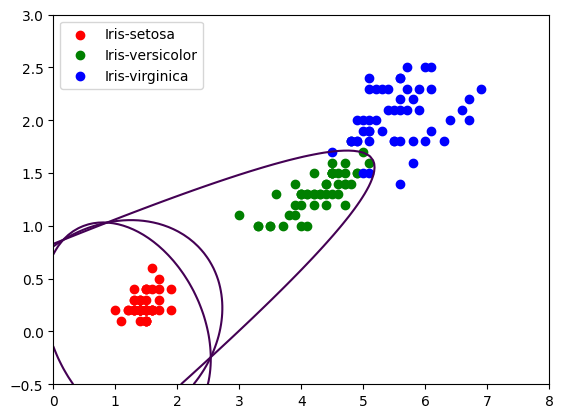

In [10]:
for i, j in [(0, 1), (0, 2), (1, 2)]:
    discriminant_plot(gi[i], gi[j])
for i in range(3):
    plot_data(X_data[i], color='rgb'[i])
plt.legend(iris_df['Species'].unique())
plt.show()